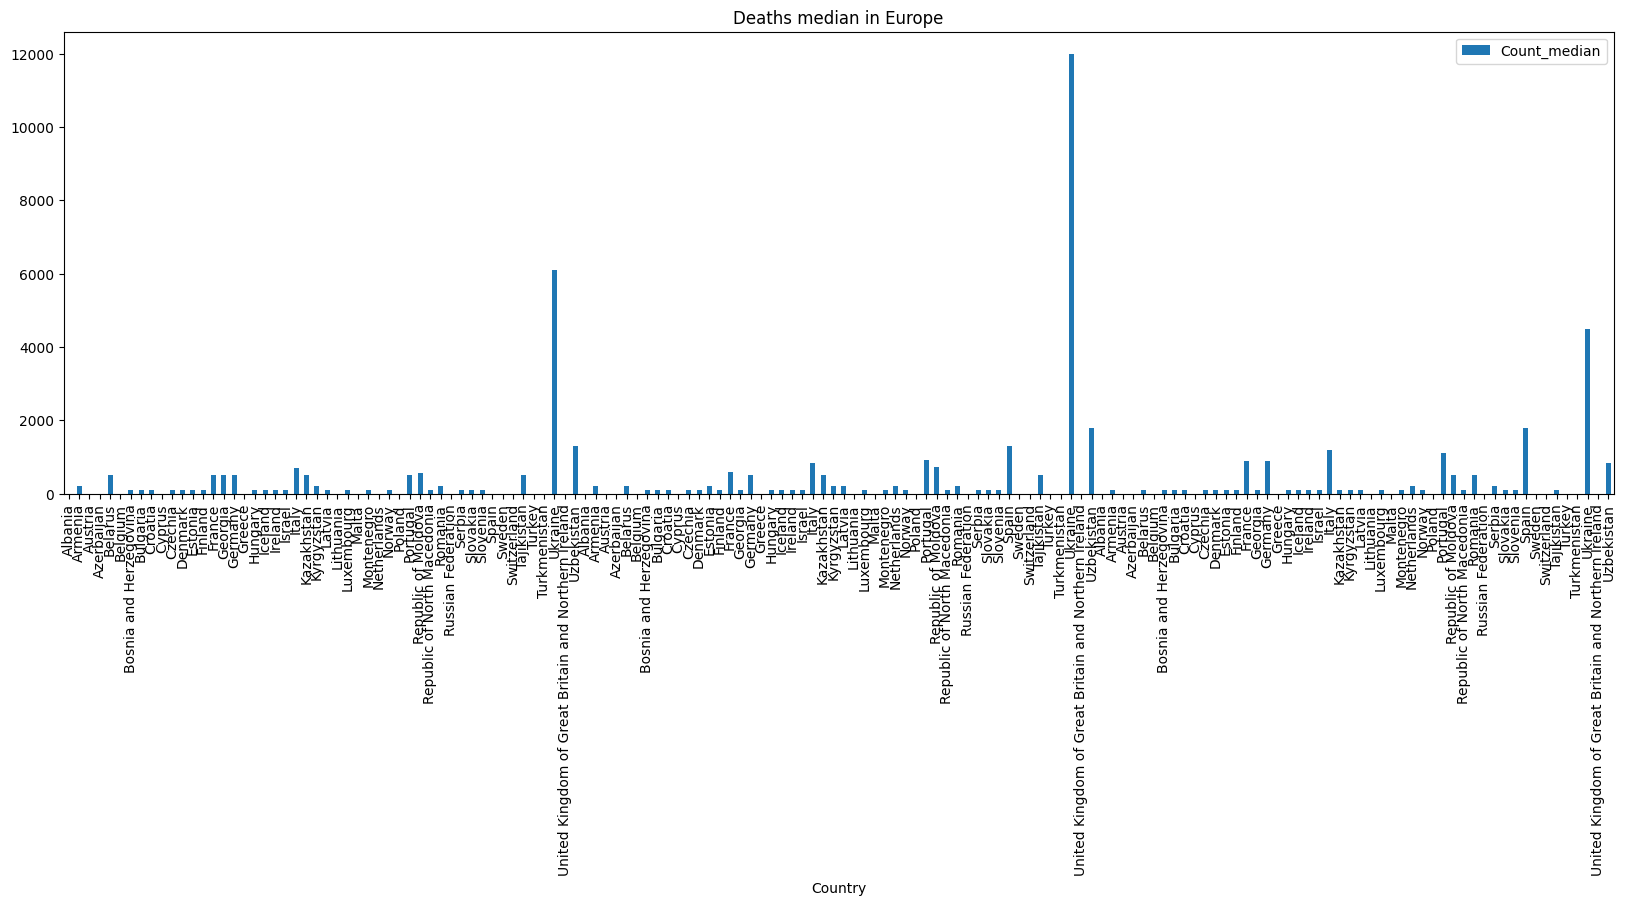

     Count_median                                            Country  \
1             NaN                                            Albania   
5           200.0                                            Armenia   
7             NaN                                            Austria   
8             NaN                                         Azerbaijan   
13          500.0                                            Belarus   
..            ...                                                ...   
495           NaN                                             Turkey   
496           NaN                                       Turkmenistan   
498        4500.0                                            Ukraine   
500           NaN  United Kingdom of Great Britain and Northern I...   
504         840.0                                         Uzbekistan   

    WHO Region  Year  
1       Europe  2018  
5       Europe  2018  
7       Europe  2018  
8       Europe  2018  
13      Europe  2018

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../csvs/no_of_deaths_by_country_clean.csv", sep=',')
europe = df[['Count_median', 'Country', 'WHO Region', 'Year']]
europe = europe[europe['WHO Region'] == 'Europe']
ax = europe.plot(kind='bar', x = 'Country', y='Count_median', figsize=(20, 6))
ax.set_title("Deaths median in Europe")
# ax.set_ylabel("Number of Deaths (millions)")
# ax.legend(title="Time Period", fontsize='small')

plt.show()
print(europe)

In [18]:
df = pd.read_csv("../csvs/no_of_deaths_by_country_clean.csv", sep=',')
df = df[['Count_median', 'Country', 'WHO Region']]
df = df[df['WHO Region'] == 'Europe']
df.to_csv("testEurope.csv", index=False)

In [19]:
grouped_df = df.groupby(['Country'])['Count_median'].median().reset_index()
result = grouped_df.merge(df[['Country', 'WHO Region']].drop_duplicates(), on='Country')
result = result.sort_values('Count_median', ascending=False).reset_index(drop=True)
grouped_df.to_csv("testeurope2.csv", index=False)
print(result)


                                              Country  Count_median WHO Region
0                                             Ukraine        6100.0     Europe
1                                               Spain        1550.0     Europe
2                                          Uzbekistan        1300.0     Europe
3                                            Portugal         930.0     Europe
4                                               Italy         830.0     Europe
5                                              France         600.0     Europe
6                                 Republic of Moldova         570.0     Europe
7                                          Tajikistan         500.0     Europe
8                                             Germany         500.0     Europe
9                                          Kazakhstan         500.0     Europe
10                                        Netherlands         200.0     Europe
11                                            Belaru

In [24]:
import plotly.graph_objects as go

# Create a list of country names and their corresponding median counts
# countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'South Sudan', 'Togo', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe']
# count_median = [200.0, 10000.0, 2200.0, 7300.0, 4800.0, 5200.0, 100.0, 19000.0, 7800.0, 3500.0, 100.0, 24000.0, 34000.0, 1400.0, 620.0, 3800.0, 20000.0, 1600.0, 970.0, 17000.0, 4300.0, 1800.0, 56000.0, 7200.0, 2700.0, 1400.0, 29000.0, 6500.0, 500.0, 500.0, 54000.0, 3500.0, 1700.0, 72000.0, 5700.0, 1300.0, 2400.0, 100000.0, 9800.0, 5600.0, 56000.0, 48000.0, 26000.0, 54000.0]
df_europe = pd.read_csv("./testeurope2.csv", sep=',')
countries = df_europe['Country']
count_median = df_europe['Count_median']

# Create a dictionary of country names and their corresponding median counts
data = dict(type='choropleth',
            locations=countries,
            locationmode='country names',
            z=count_median,
            colorscale='Viridis',
            colorbar=dict(title='Median Count')
           )

# Define the layout of the map
layout = dict(title='Median Count of Countries in Eur',
              geo=dict(scope='europe')
             )

# Create the map
fig = go.Figure(data=[data], layout=layout)
fig.show()